# House Prices - Advanced Regression Techniques (Kaggle)

Run after following notebooks are run:
1. 01 Data Cleaning

#### Development Ideas
* research how to systematically loop through all relationship graphs
* https://medium.com/@sebastiencallebaut/kaggle-housing-competition-learn-with-a-step-by-step-solution-bdca19cc8eed

In [1]:
### set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

pd.options.display.max_rows = 100

## Load Data

In [2]:
### load data (cleaned)
train = pd.read_csv('train_clean.csv')

### convert all object datatypes to category
for col in train.select_dtypes(include='object'):
    train[col] = train[col].astype('category')

### convert additional columns to category datatype
train['MSSubClass'] = train['MSSubClass'].astype('category')

## Univariate (One-way) Analysis

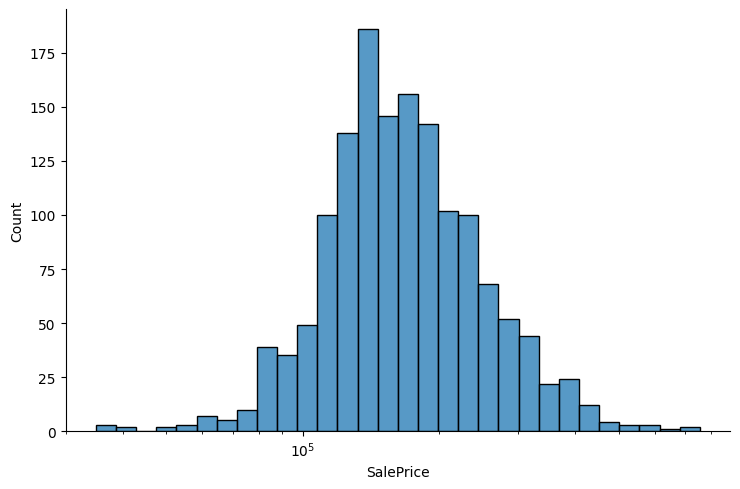

In [3]:
### histogram of sale price
g=sns.displot(data=train, x='SalePrice', bins=30, log_scale=True, aspect=1.5)

### Categorical Variables

Observations
* Variables where almost all houses are in the same category - hence can be dropped
    * 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature', 
* Categorical variables that didn't seem predictive (at least not on its own):
    * 'Alley','LandSlope', 'Condition1', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'HeatingQC', 'Functional', 'remodel_flag'
* Potential drivers of higher sale price:
    * MSSubClass = 60
    * LotShape = IR2 or IR3
    * LotConfig = CulDSac
    * Neighbourhood
    * HouseStyle = 2Story
    * RoofStyle = Hip
    * MsVnrType = Stone
    * ExterQual/BsmtQual/HeatingQC/KitchenQual = Ex
    * Foundatino = PConc
    * BsmtExposure = GD
    * CentralAir = Y
    * GarageType = BuiltIn
    * SaleType = New
    * SaleCondition = Partial

Ideas for feature engineering
* Group categories with very few observations in to 'Other' category
* SaleType - group into only 'new' or 'old'
* Qual/Cond variables - group Fa and TA together 

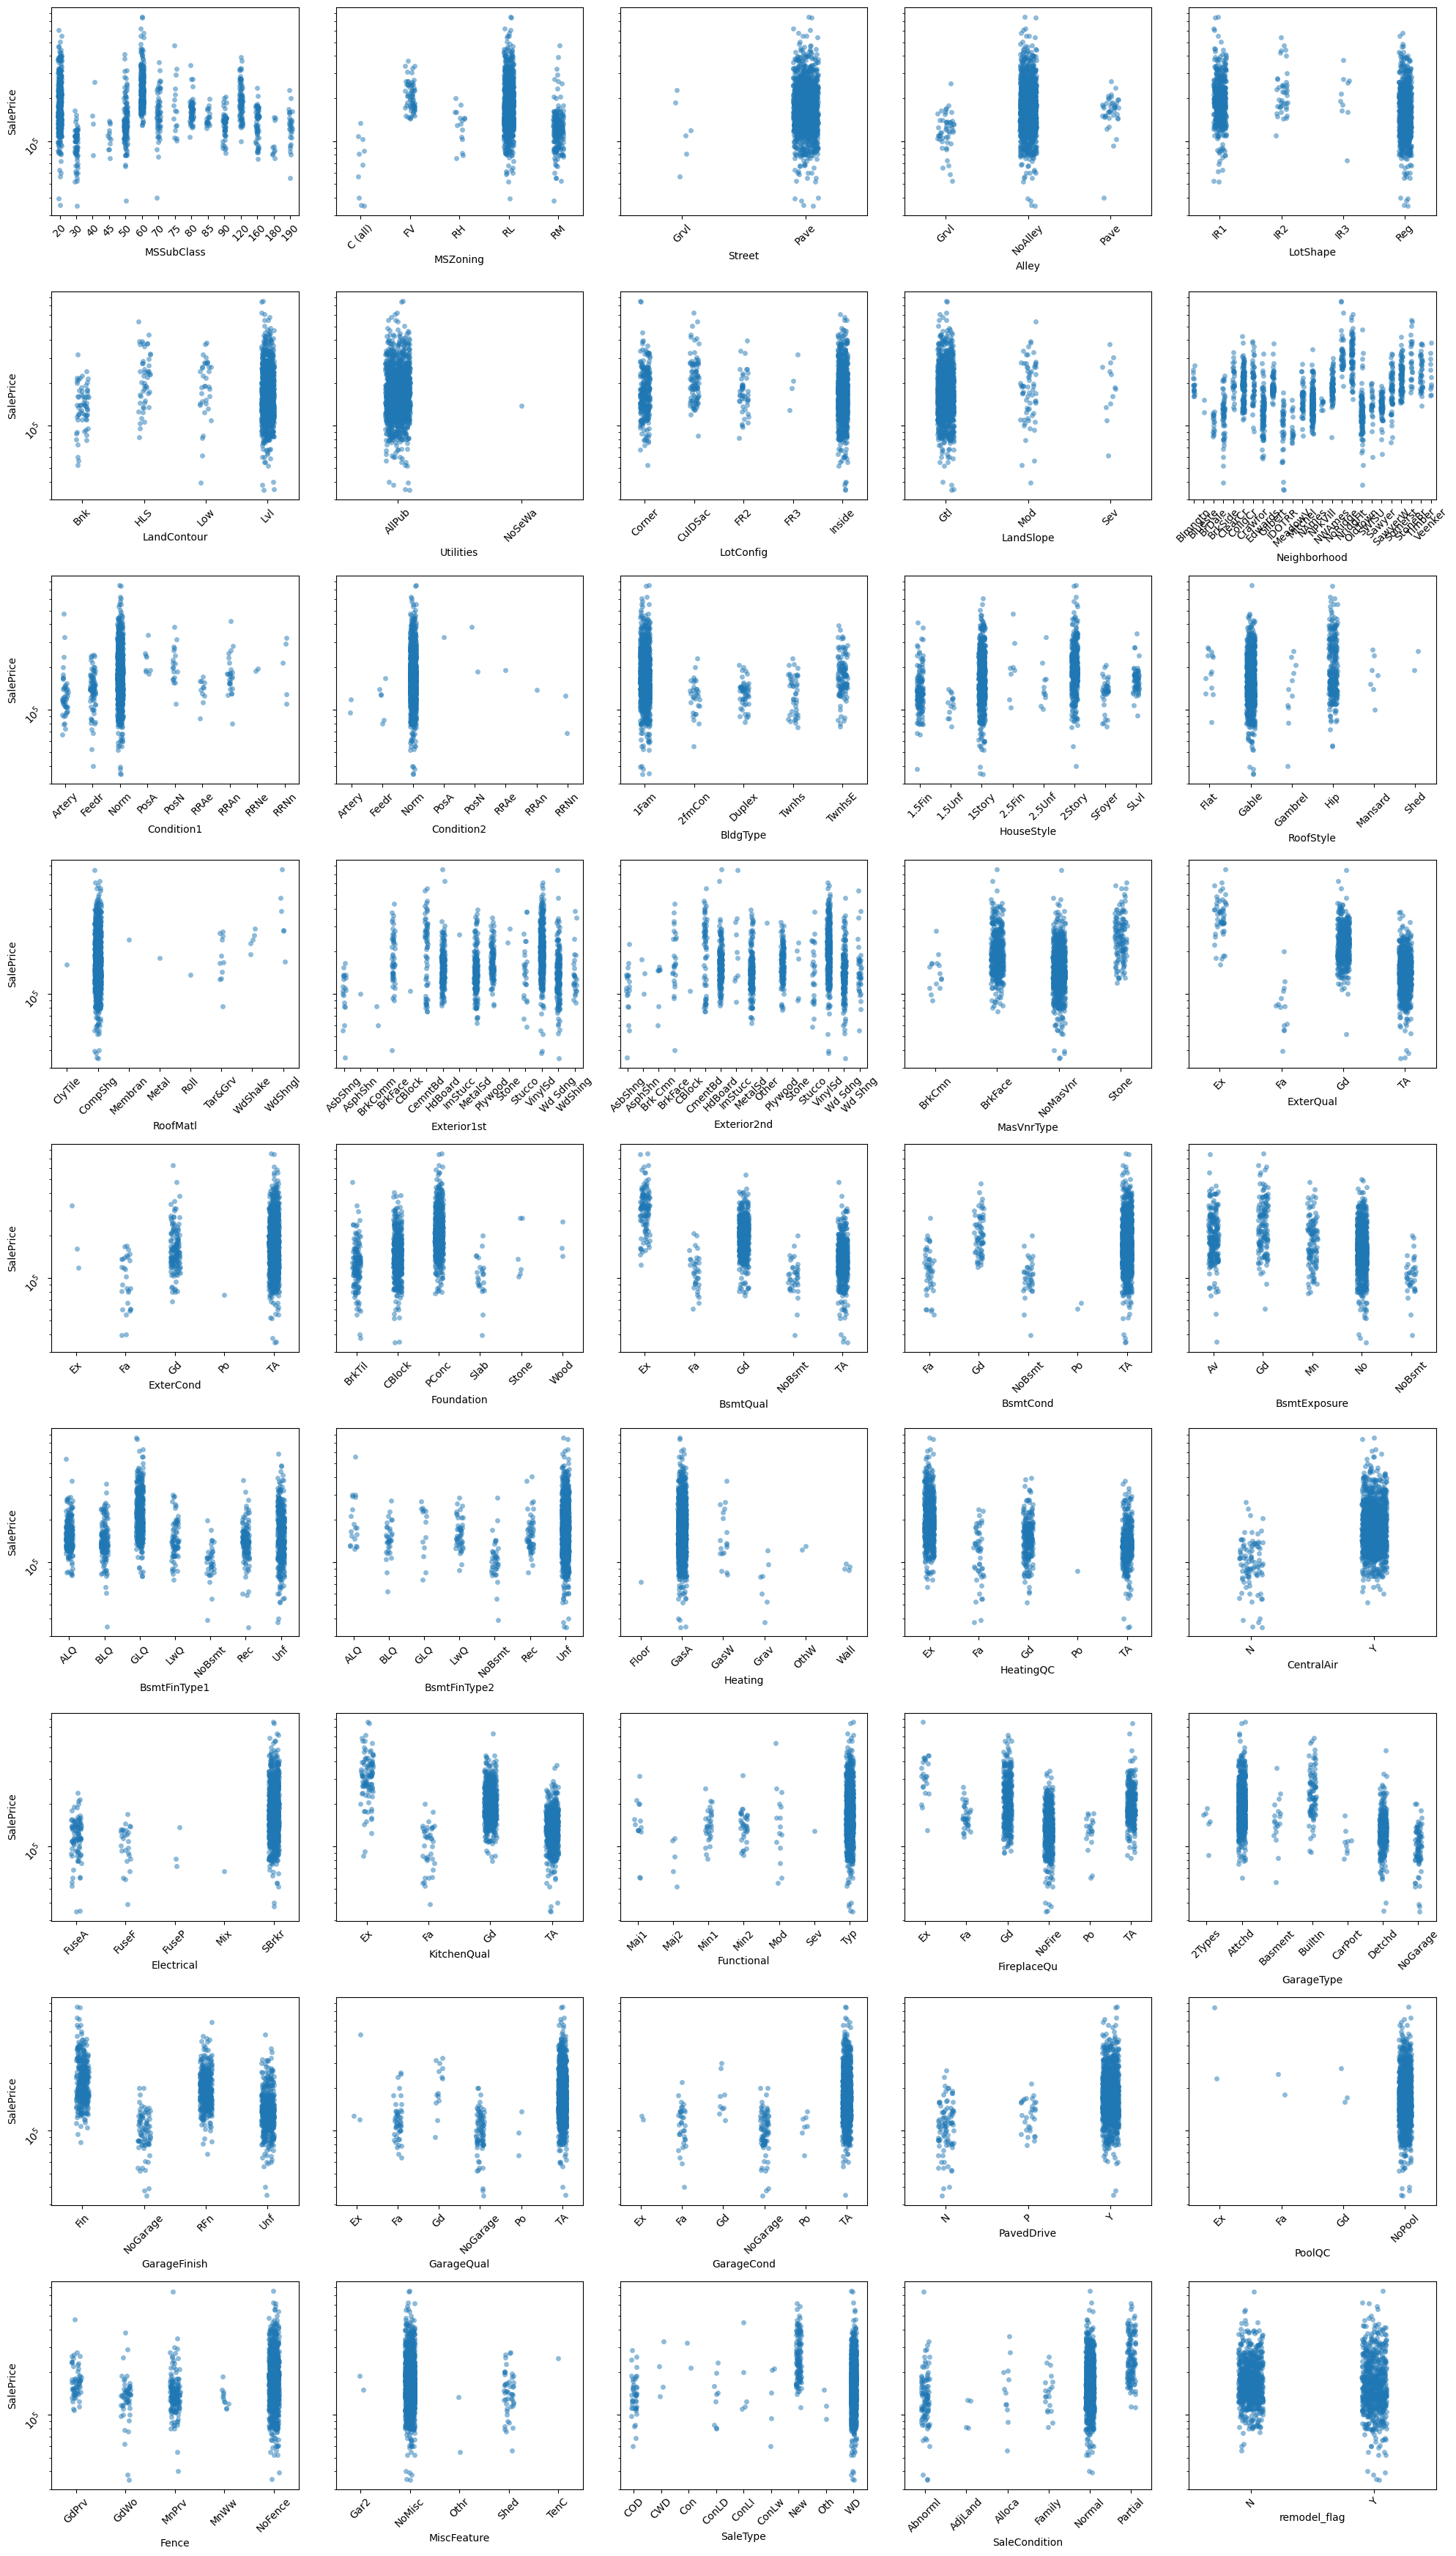

In [4]:
### list of all categorical variables
cols_cat = train.select_dtypes(include='category').columns.to_list()

### set up grid of subplots, then fill it with scatterplots of each categorical variable vs SalePrice
fig, axes = plt.subplots(ncols=5, nrows=9, figsize=(20,35), sharey=True)
for i, col in enumerate(cols_cat):
    ax = axes.ravel()[i]
    sns.stripplot(data=train, x=col, y='SalePrice', ax=ax, alpha=0.5)
    plt.yscale('log')
    ax.tick_params(labelrotation=45)
plt.tight_layout()

In [5]:
### drop variables where almost all houses are in the same category
train.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature'], 
            axis=1, inplace=True)

### Numerical Variables

Observations
* Variables that are 0 for almost all houses - hence can be dropped
    * 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
* More houses are sold in the warmer months
* Variables with outliers - may need to exclude
    * 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'
* Very few houses have more than one half bath - can combined full and half bath columns
* Most of the continuous variables are right skewed
* Potential drivers of higher sale price:
    * Most numerical variables have a somewhat linear relationship with log SalePrice
    * Strongest relationship are the variables that relate to area
    * Exception is BsmtUnfSF and BsmtFinSF2, which don't look like any relationship with SalePrice

Ideas for feature engineering
* OverallQual & OverallCond - group <5 together


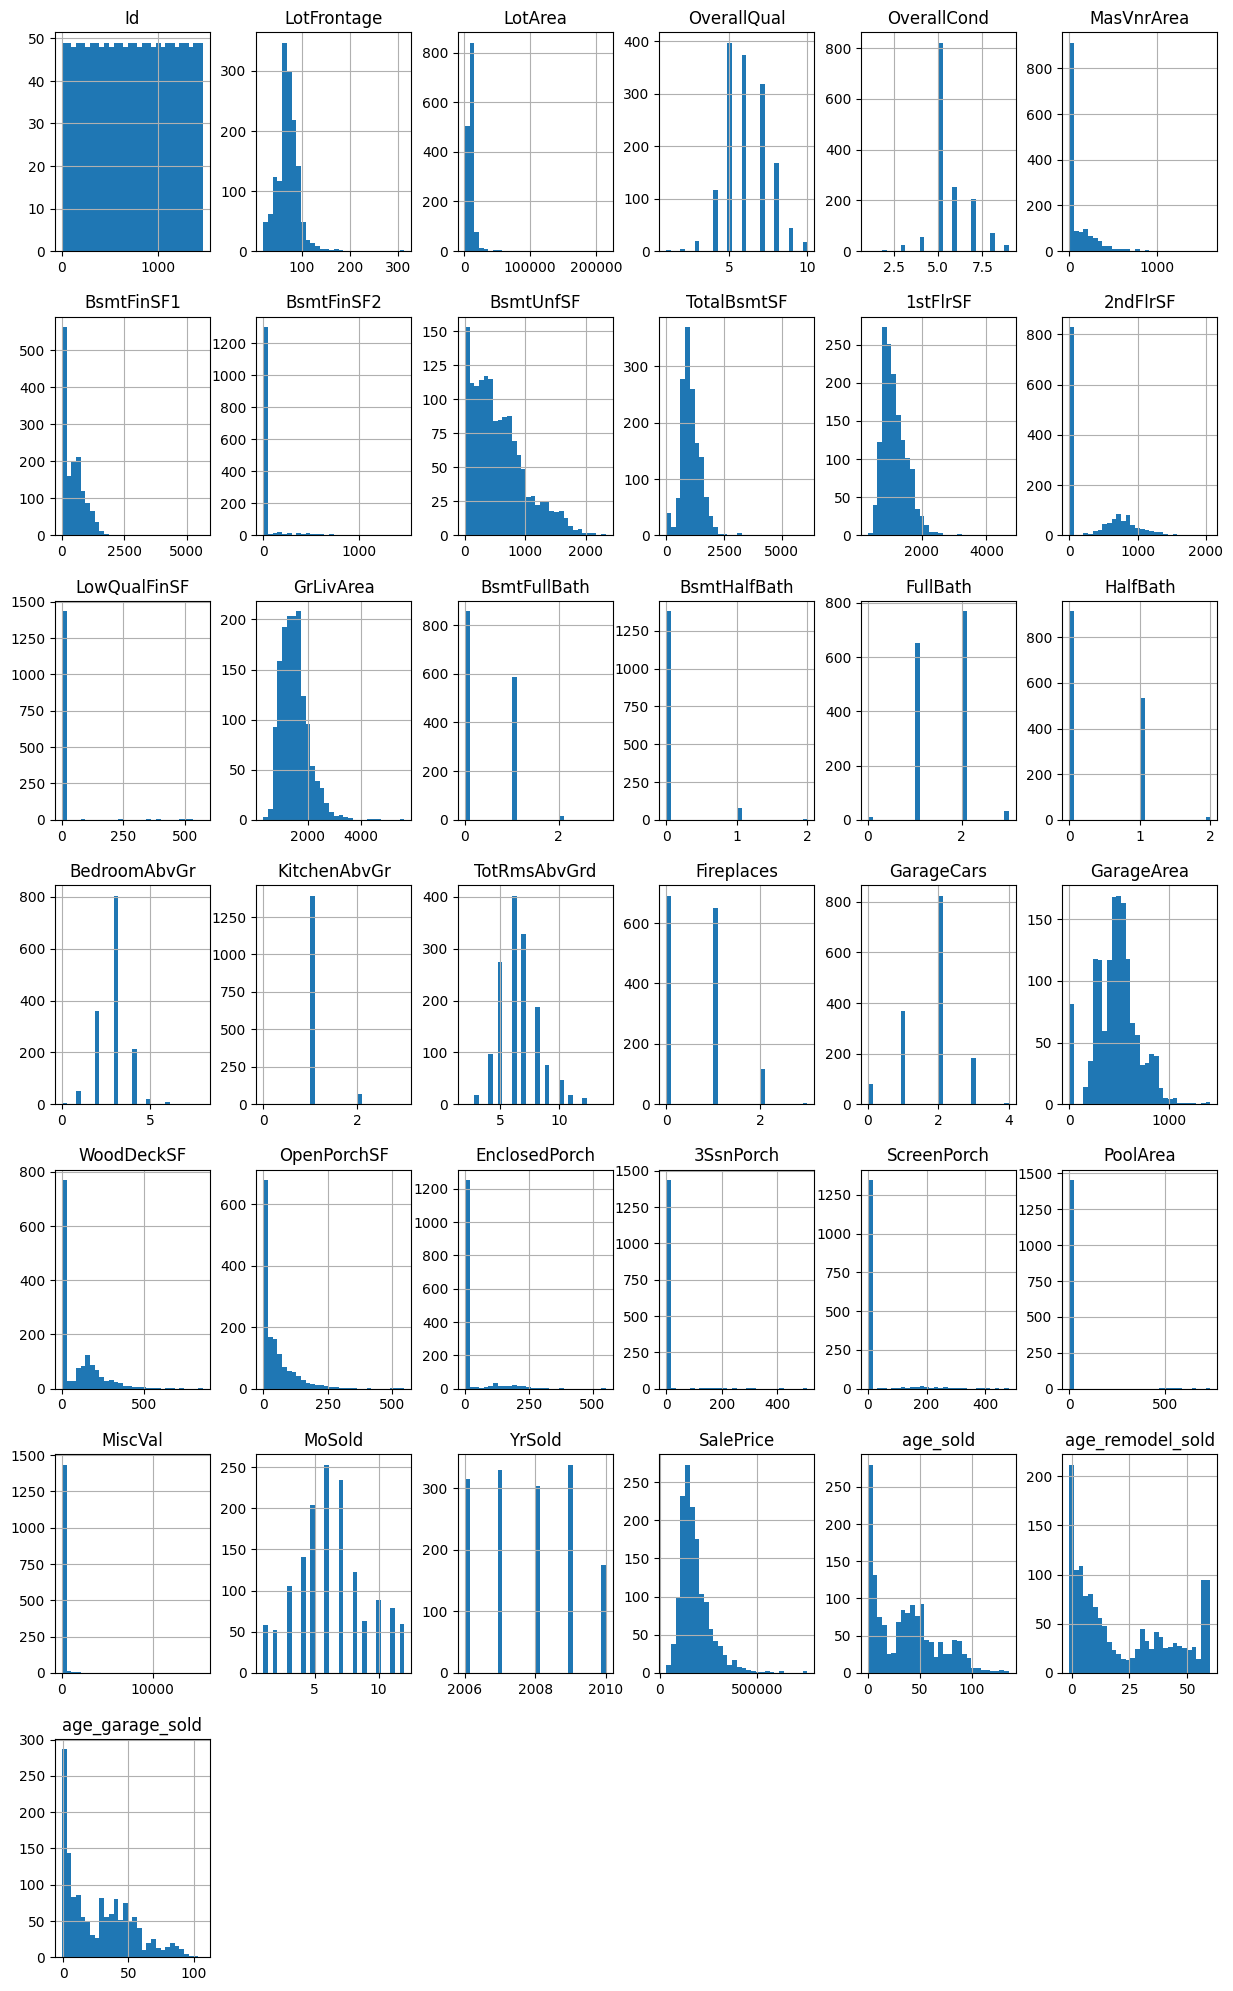

In [6]:
### Histograms of all numerical variables
train.hist(bins=30, figsize=(15,25), layout=(-1,6))
None

In [7]:
### drop variables that are 0 for almost all houses
train.drop(['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], 
            axis=1, inplace=True)

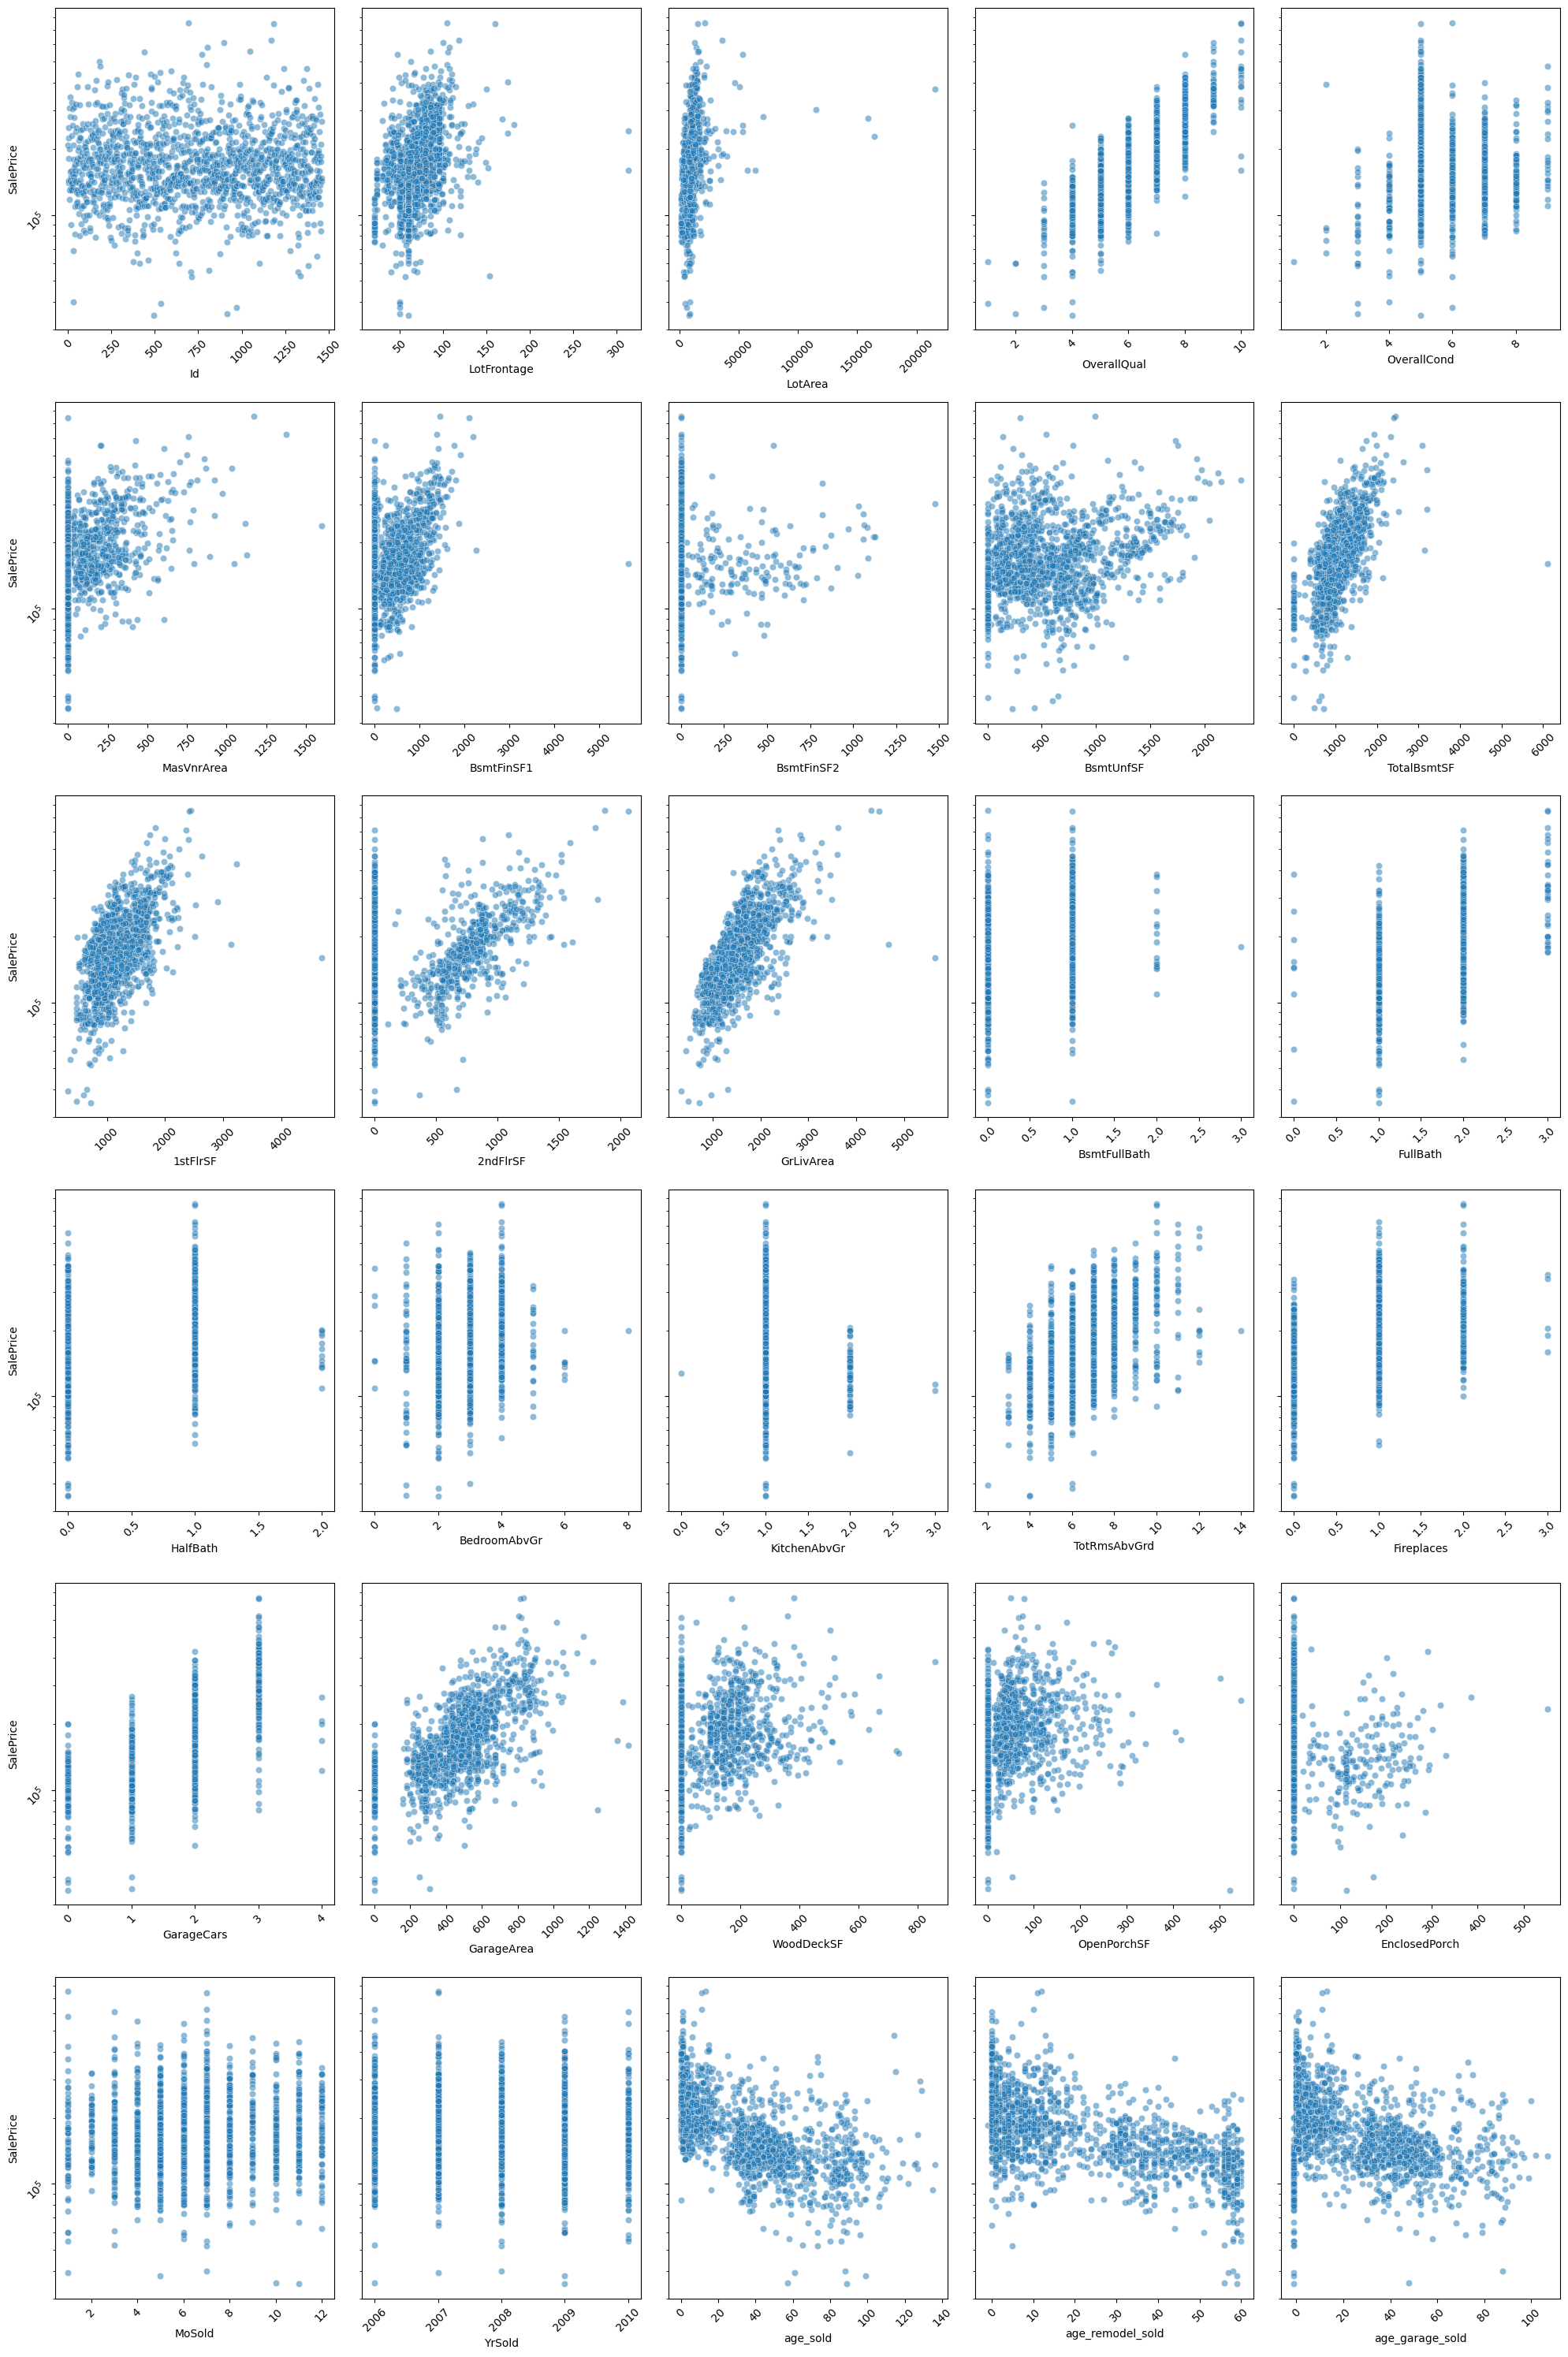

In [19]:
### list of all numerical variables
cols_num = train.select_dtypes(include=['float', 'int']).columns.to_list()
cols_num.remove('SalePrice')

### set up grid of subplots, then fill it with scatterplots of each numerical variable vs SalePrice
fig, axes = plt.subplots(ncols=5, nrows=6, figsize=(20,30), sharey=True)
for i, col in enumerate(cols_num):
    ax = axes.ravel()[i]
    sns.scatterplot(data=train, x=col, y='SalePrice', ax=ax, alpha=0.5)
    plt.yscale('log')
    ax.tick_params(labelrotation=45)
plt.tight_layout()

#### Seasonality

Observations
* SalePrice are higher in warmer months
* Much more sales in warmer months

[None]

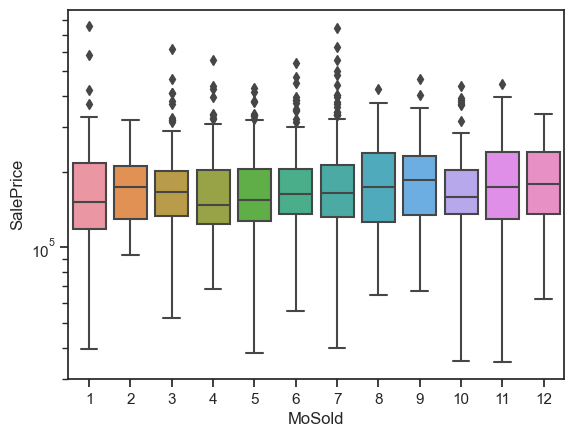

In [47]:
### Looking at distribution of SalePrice by sale month
g=sns.boxplot(data=train, x='MoSold', y='SalePrice')
g.set(yscale='log')

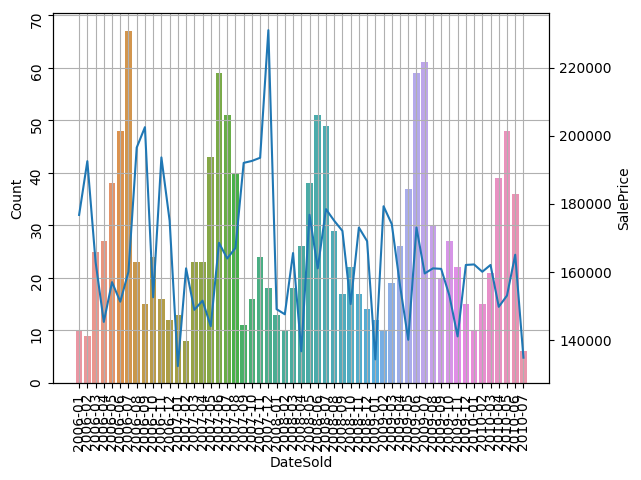

In [68]:
### Graph median SalePrice over time with exposure 
train['DateSold'] = train['YrSold'].astype(str) + '-' + train['MoSold'].astype(str).str.zfill(2)
datesold_median = train.groupby('DateSold').agg(Count=('DateSold', 'size'), SalePrice=('SalePrice', 'median')).reset_index()

## Graph exposure first
g=sns.barplot(data=datesold_median, x='DateSold', y='Count')
g.tick_params(labelrotation=90)
g.grid()

## Graph median sale price on top
h = g.twinx()
sns.lineplot(data=datesold_median, x='DateSold', y='SalePrice')
None

## Bivariate (Two-way) Analysis

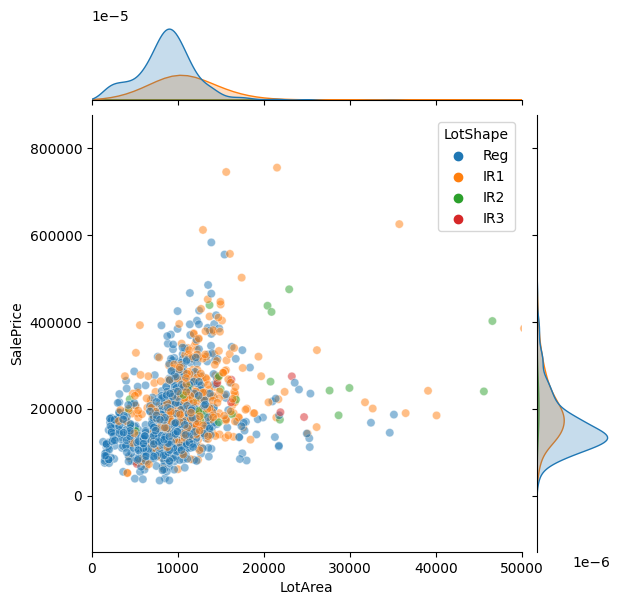

In [28]:
### multivariate views
g=sns.jointplot(data=train,x='LotArea',y='SalePrice',hue='LotShape',xlim=(0,50000),alpha=0.5)

In [5]:
## correlation plots between continuous
## kramers v for relationship between categorical

